In [21]:
import warnings
warnings.filterwarnings("ignore")

""" 
    Exploratory data analysis of the enron dataset
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns  

enron_df = pd.DataFrame(enron_data)
enron_df = enron_df.transpose()
enron_df = enron_df.apply(pd.to_numeric, errors='coerce')

In [22]:
enron_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                0 non-null float64
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64


In [23]:
enron_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,NaN,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,NaN,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,NaN,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [24]:
# check if all payments add up to total_payments

col_to_add = ['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'expenses',
 'loan_advances',
 'long_term_incentive',
 'other',
 'salary']

enron_df['total_pay'] = enron_df[col_to_add].sum(axis = 1, skipna = True)
enron_df.loc[enron_df['total_payments'] != enron_df['total_pay']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_pay
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093,-99215
BHATNAGAR SANJAY,NaN,NaN,NaN,137864,NaN,2604490,NaN,29,0,1,...,137864,False,-2604490,15456290,NaN,463,523,15456290,NaN,275728
CHAN RONNIE,NaN,NaN,-98784,98784,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,32460,-32460,NaN,NaN,NaN,NaN,NaN,0
CHRISTODOULOU DIOMEDES,NaN,NaN,NaN,NaN,NaN,5127155,NaN,NaN,NaN,NaN,...,NaN,False,950730,NaN,NaN,NaN,NaN,NaN,6077885,0
CLINE KENNETH W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,662086,-472568,NaN,NaN,NaN,NaN,189518,0
CORDES WILLIAM R,NaN,NaN,NaN,NaN,NaN,651850,NaN,12,10,0,...,NaN,False,386335,NaN,NaN,58,764,NaN,1038185,0
FOWLER PEGGY,NaN,NaN,NaN,NaN,NaN,1324578,NaN,36,0,0,...,NaN,False,560170,NaN,NaN,10,517,NaN,1884748,0
GATHMANN WILLIAM D,NaN,NaN,NaN,NaN,NaN,1753766,NaN,NaN,NaN,NaN,...,NaN,False,264013,-72419,NaN,NaN,NaN,NaN,1945360,0
GILLIS JOHN,NaN,NaN,NaN,NaN,NaN,9803,NaN,NaN,NaN,NaN,...,NaN,False,75838,NaN,NaN,NaN,NaN,NaN,85641,0
HAYSLETT RODERICK J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061,35,38,...,NaN,False,346663,NaN,NaN,571,2649,NaN,346663,0


In [25]:
# Get rid of outliers and fix errors

enron_df.columns.name = 'Name'
enron_df = enron_df[enron_df.index != 'TOTAL']
enron_df = enron_df[enron_df.index != 'THE TRAVEL AGENCY IN THE PARK']

enron_df.loc['BELFER ROBERT', 'deferral_payments'] = 'NaN'
enron_df.loc['BELFER ROBERT', 'deferred_income'] = -102500
enron_df.loc['BELFER ROBERT', 'director_fees'] = 102500
enron_df.loc['BELFER ROBERT', 'expenses'] = 3285
enron_df.loc['BELFER ROBERT', 'restricted_stock'] = 44093
enron_df.loc['BELFER ROBERT', 'restricted_stock_deferred'] = -44093
enron_df.loc['BELFER ROBERT', 'total_payments'] = 3285
enron_df.loc['BELFER ROBERT', 'total_stock_value'] = 'NaN'
enron_df.loc['BELFER ROBERT', 'exercised_stock_options'] = 'NaN'

enron_df.loc['BHATNAGAR SANJAY', 'deferral_payments'] = 'NaN'
enron_df.loc['BHATNAGAR SANJAY', 'expenses'] = 137864
enron_df.loc['BHATNAGAR SANJAY', 'director_fees'] = 'NaN'
enron_df.loc['BHATNAGAR SANJAY', 'other'] = 'NaN'
enron_df.loc['BHATNAGAR SANJAY', 'exercised_stock_options'] = 15456290
enron_df.loc['BHATNAGAR SANJAY', 'restricted_stock'] = 2604490
enron_df.loc['BHATNAGAR SANJAY', 'restricted_stock_deferred'] = -2604490
enron_df.loc['BHATNAGAR SANJAY', 'total_stock_value'] = 15456290
enron_df.loc['BHATNAGAR SANJAY', 'total_payments'] = 137864



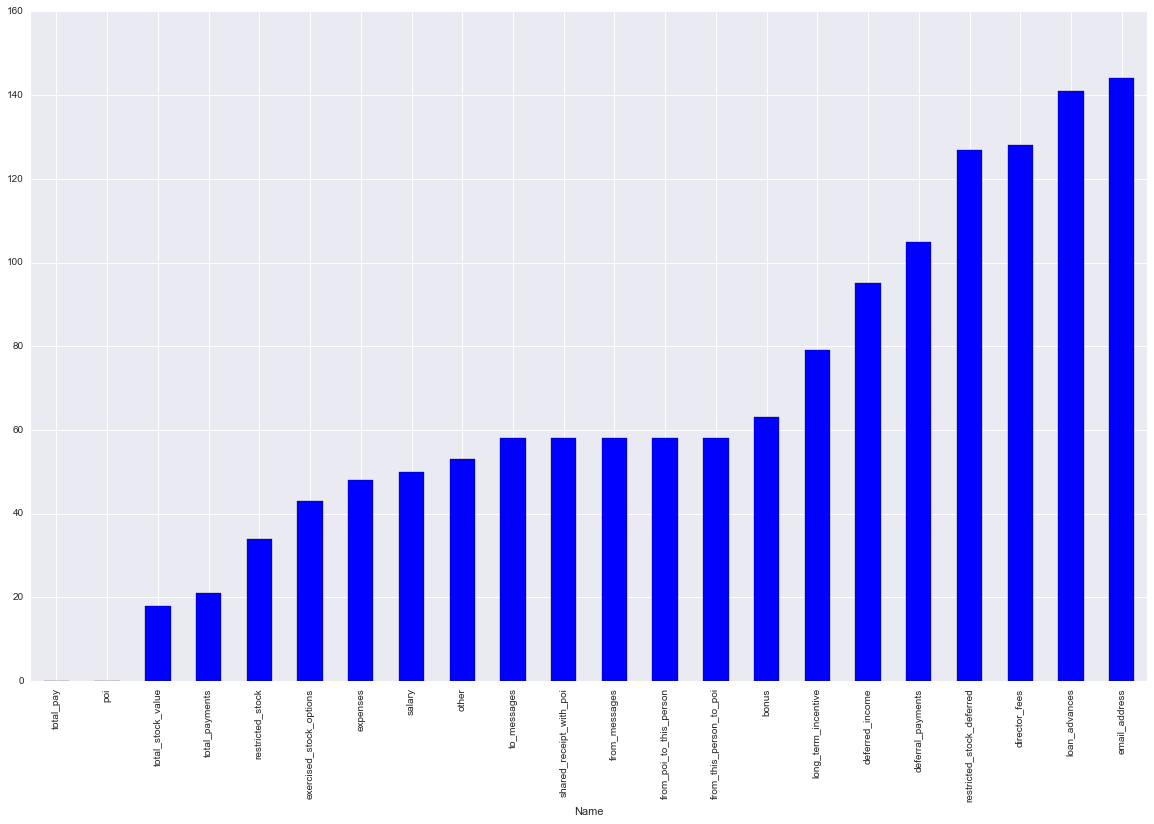

In [26]:
%matplotlib inline

# number of missing values for each variable
missing = enron_df.isnull().sum()
missing = missing.sort_values()

plt.figure(figsize=(20,12)) 

missing.plot(kind = 'bar')

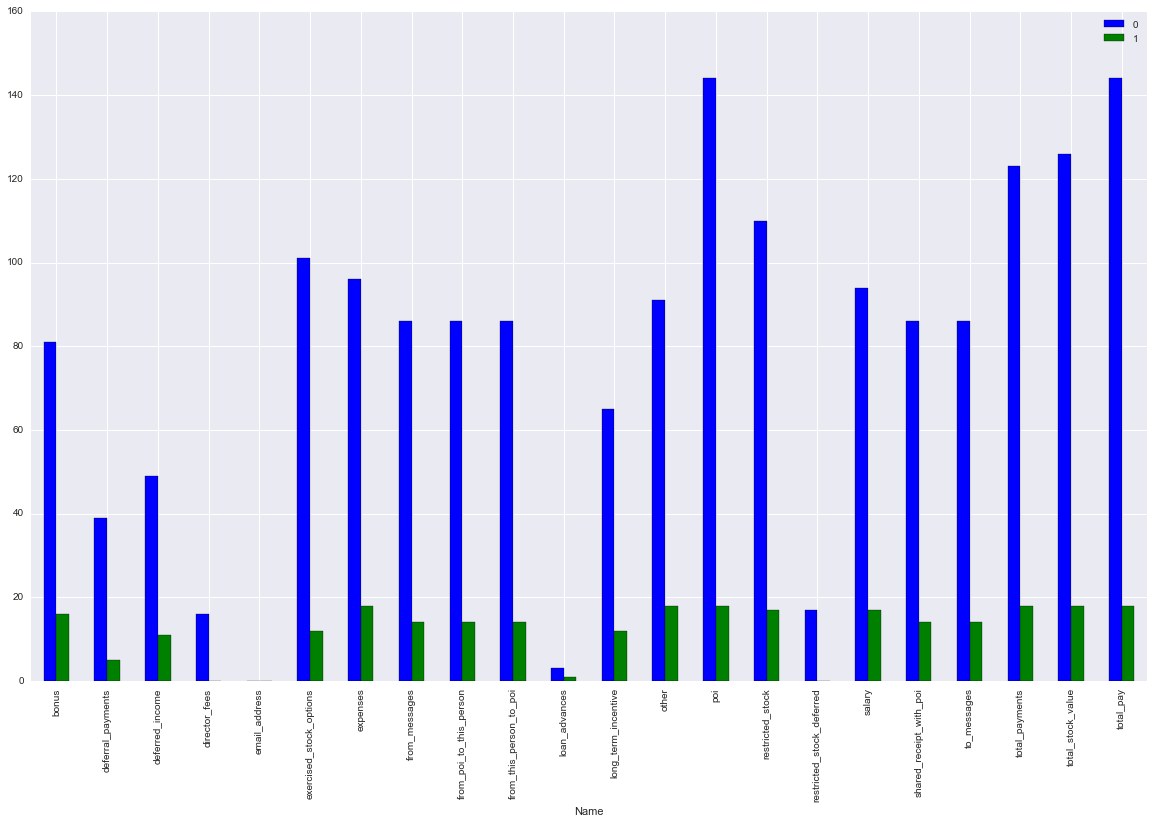

In [27]:
# number of non-missing values for each variable and for both poi categories (True and False)


non_null_total = enron_df.count()
non_null_poi = enron_df[enron_df.poi == True]
non_null_poi = non_null_poi.count()
g = pd.concat([non_null_total, non_null_poi], axis=1)

g.plot(kind = 'bar', figsize = (20, 12))

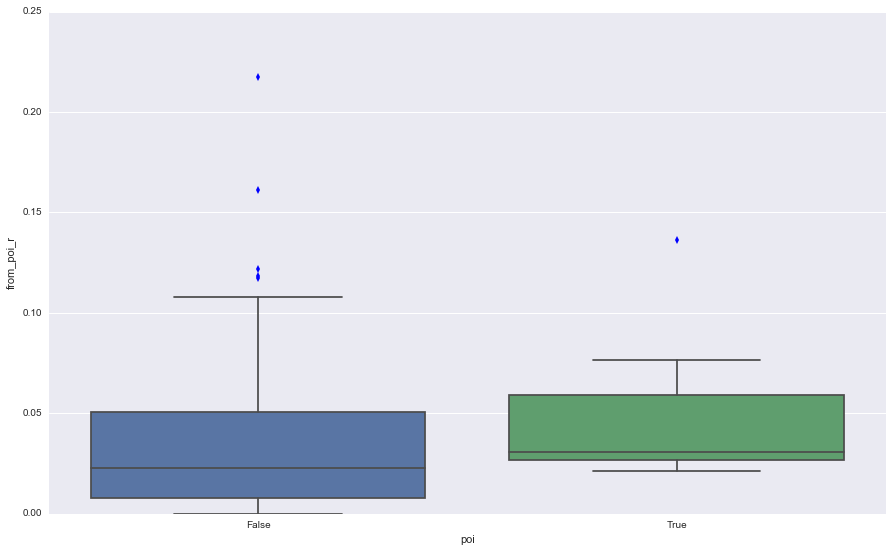

In [28]:
# email features !! 

# ratio of messaged form poi to all messages received
enron_df['from_poi_r'] = enron_df['from_poi_to_this_person'] / enron_df['to_messages']

# ratio of messages sent to poi to all sent mesages
enron_df['to_poi_r'] = enron_df['from_this_person_to_poi'] / enron_df['from_messages']


#  distribution of from_poi_r values for the poi and non-poi personnel 
plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'from_poi_r', x = 'poi', data = enron_df)


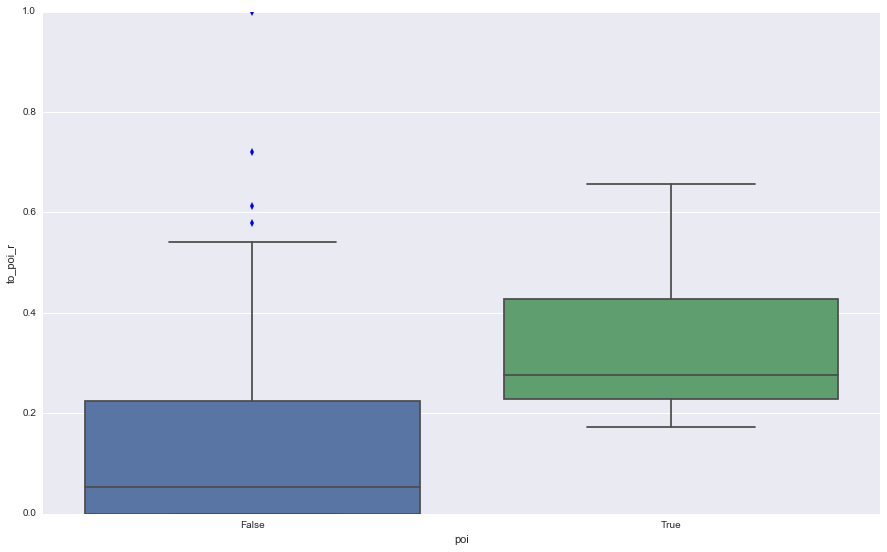

In [29]:
#  distribution of to_poi_r values for the poi and non-poi personnel 

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'to_poi_r', x = 'poi', data = enron_df)


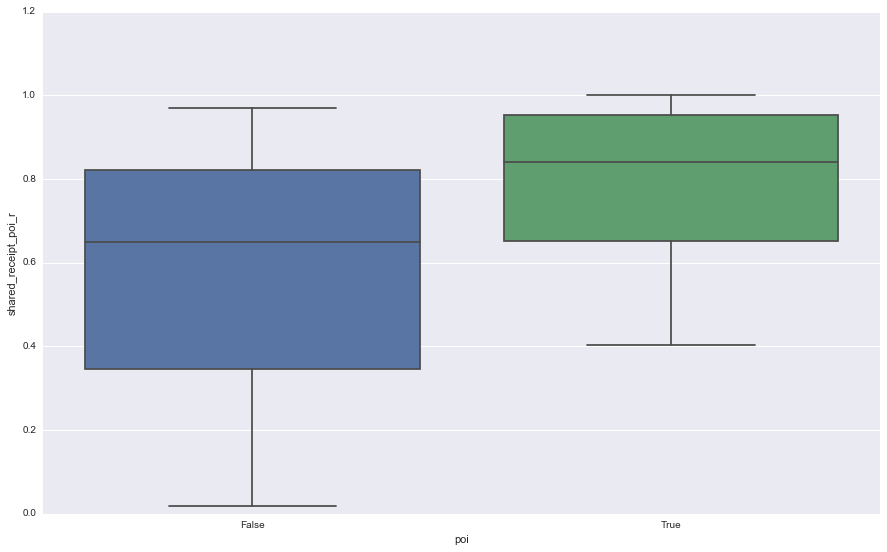

In [31]:
# email features !! - ratio of messages with sahred receipt with poi to all messages received
enron_df['shared_receipt_poi_r'] = enron_df['shared_receipt_with_poi'] / enron_df['to_messages']

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'shared_receipt_poi_r', x = 'poi', data = enron_df)


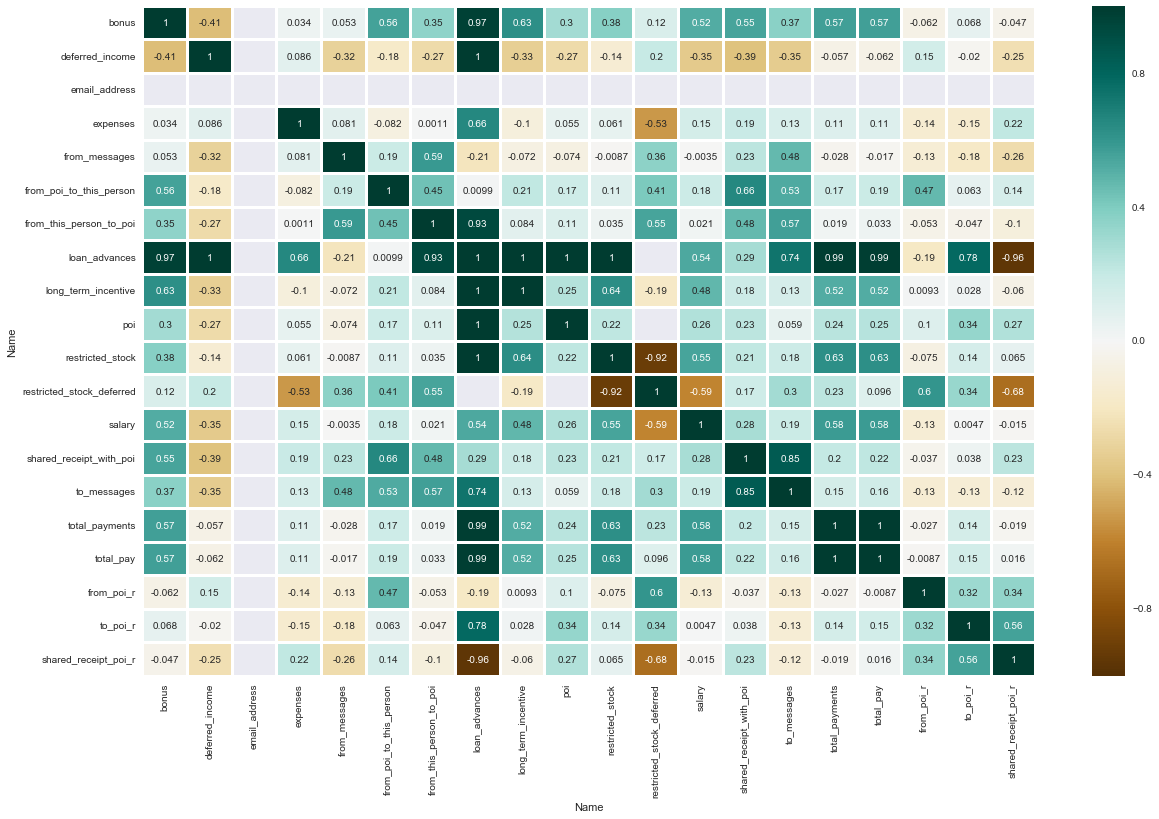

In [32]:
import seaborn as sns  
%matplotlib inline               
# Heatmap showing the correlations between each separate columns of the dataset. 

# define the size of the plot
plt.figure(figsize=(20,12)) 

sns.heatmap(data = enron_df.corr(), cmap = 'BrBG', annot = True, linewidths = 2) 


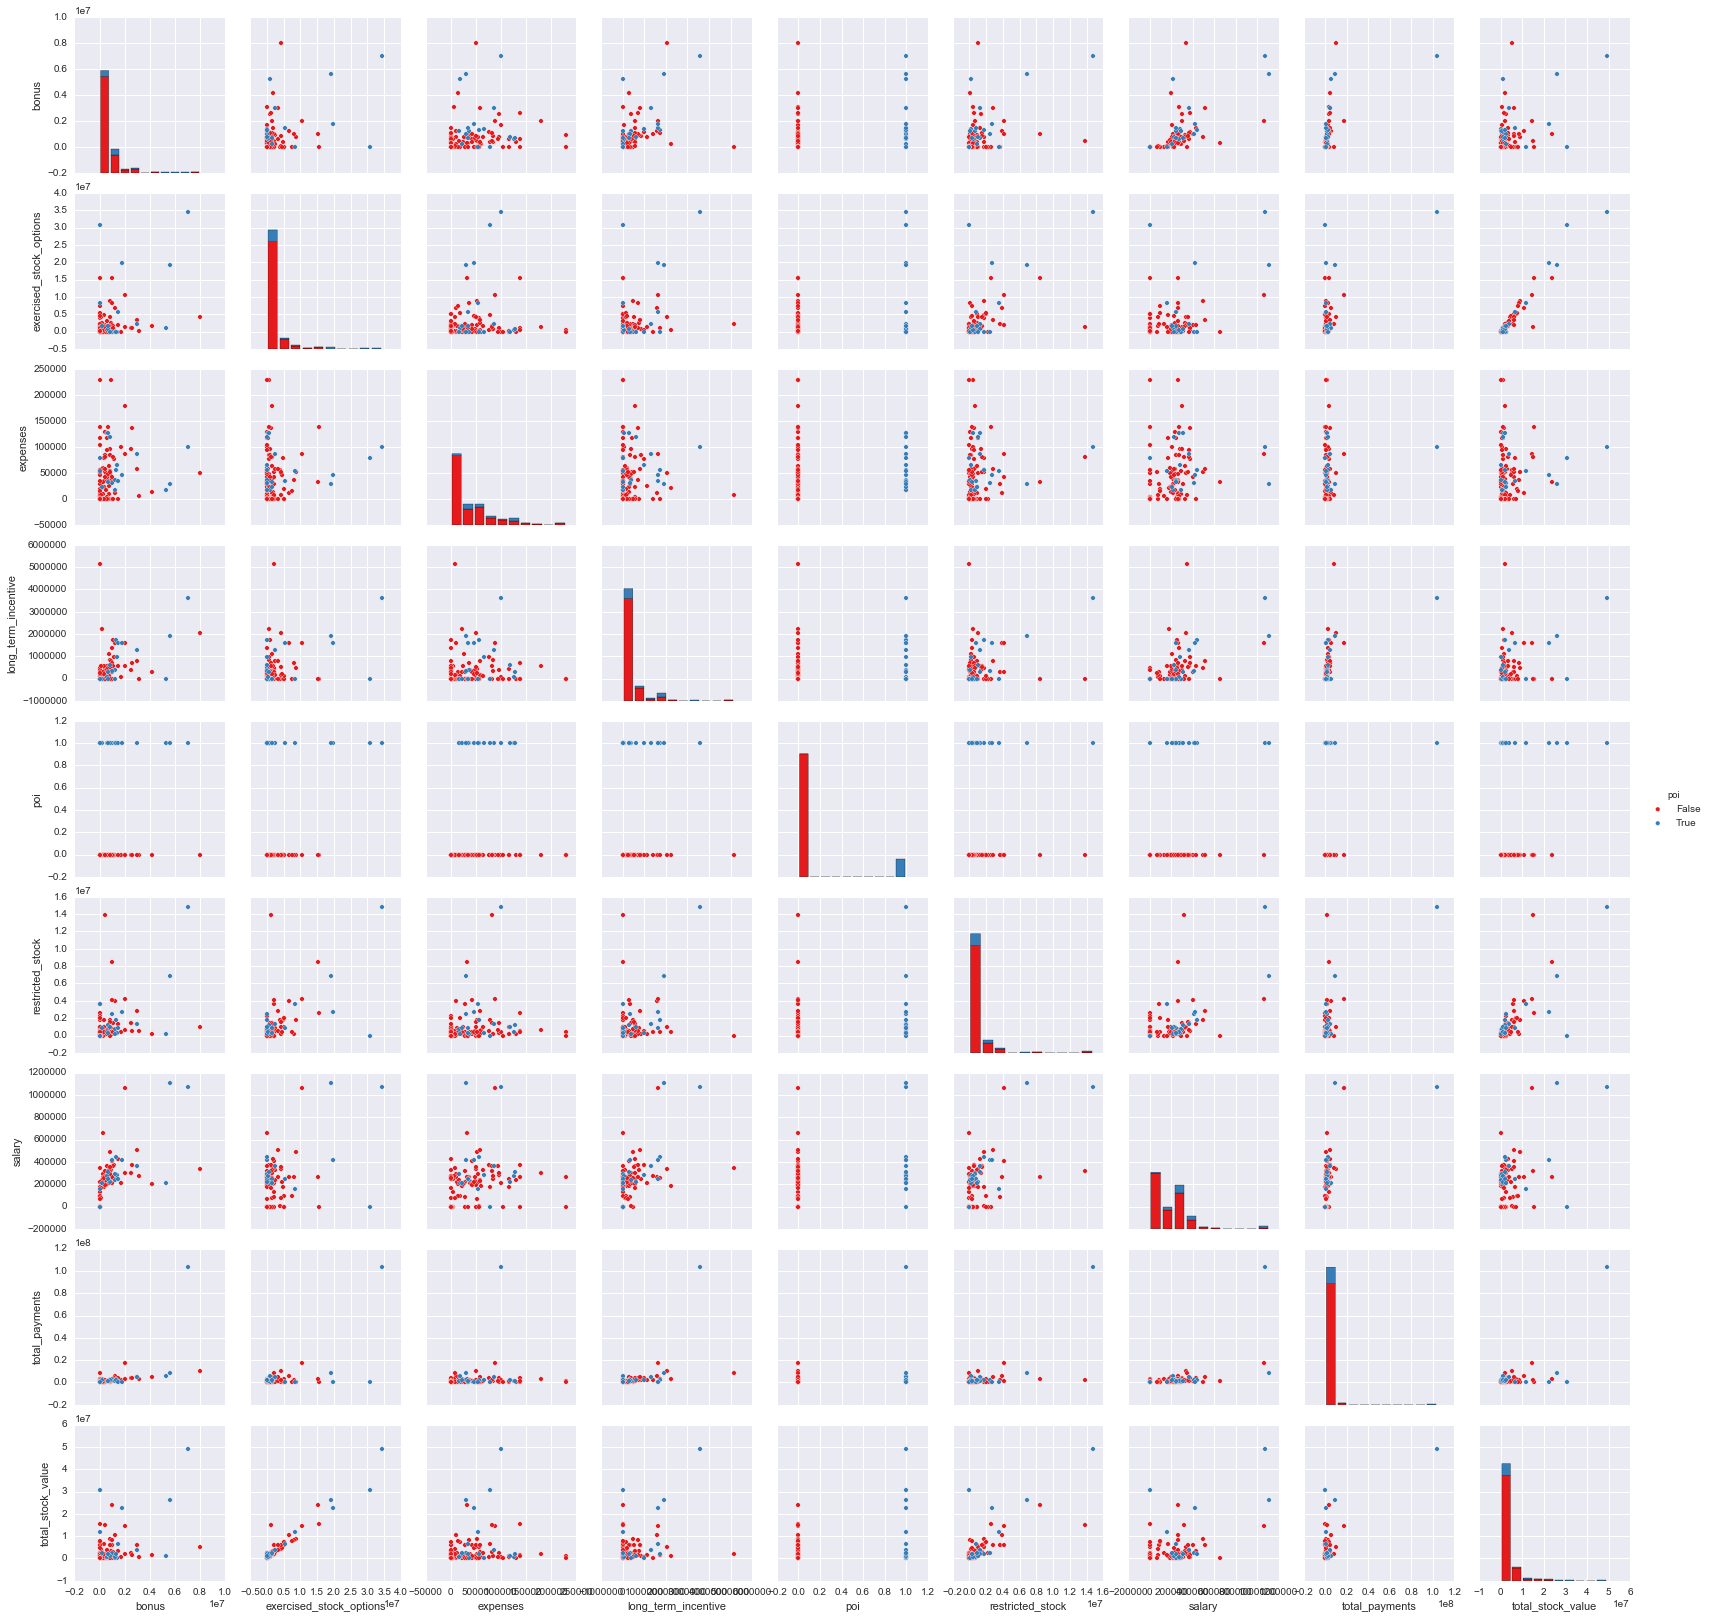

In [37]:
import seaborn as sns  
%matplotlib inline               
# scatter plot between selected features

enron_df_finance = enron_df[['bonus', 
                             'exercised_stock_options',
                             'expenses',
                             'long_term_incentive',
                             'poi',
                             'restricted_stock',
                             'salary',
                             'total_payments',
                             'total_stock_value']]

enron_df = enron_df.apply(pd.to_numeric, errors='coerce')


sns.set(font_scale = 1)
sns.pairplot(data = enron_df_finance, hue = "poi",  palette = "Set1")


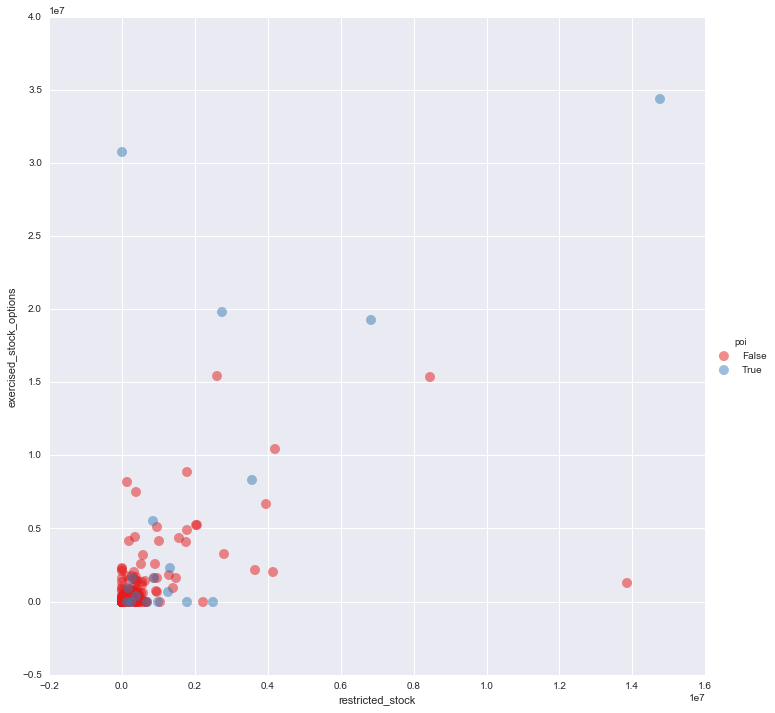

In [43]:
# scatter plot - exercised_stock_options v. restricted_stock

import seaborn as sns  
%matplotlib inline               

col_2 = 'exercised_stock_options'
col_1 = 'restricted_stock'

sns.lmplot(x = col_1, y = col_2, hue = 'poi', data = enron_df, 
           ci = None, fit_reg = False, size = 10, aspect = 1, palette="Set1", scatter_kws={"s": 100, 'alpha':0.5})



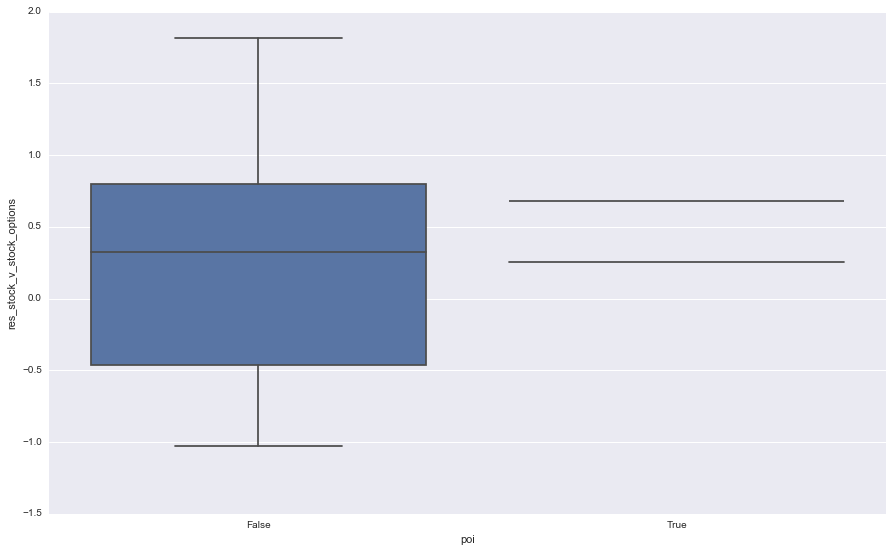

In [77]:
# distribution - restricted stock options v. exercised stock options
enron_df['res_stock_v_stock_options'] = np.log10(enron_df['exercised_stock_options'] / enron_df['restricted_stock'])

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'res_stock_v_stock_options', x = 'poi', data = enron_df)


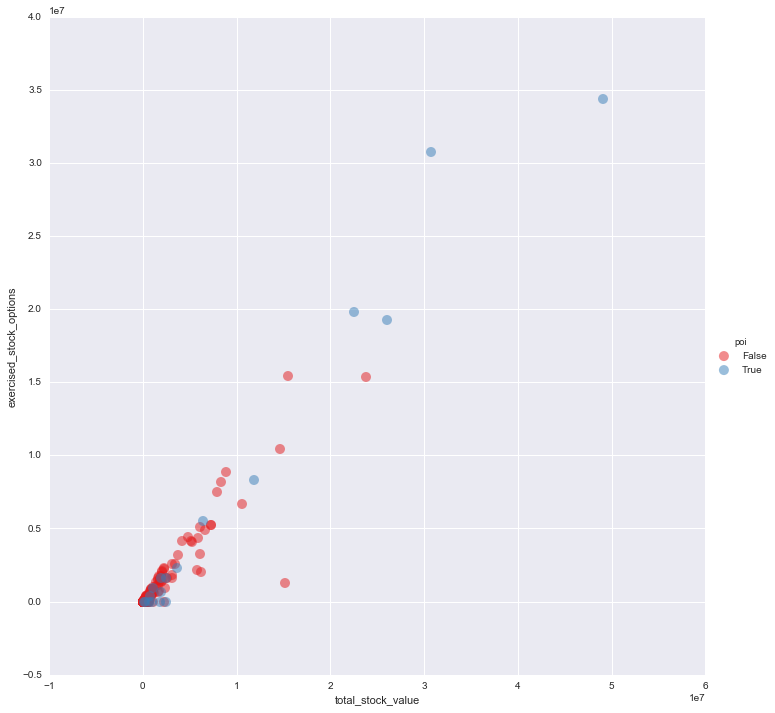

In [44]:
# scatter plot - exercised_stock_options v. total_stock_value

import seaborn as sns  
%matplotlib inline               

col_2 = 'exercised_stock_options'
col_1 = 'total_stock_value'

sns.lmplot(x = col_1, y = col_2, hue = 'poi', data = enron_df, 
           ci = None, fit_reg = False, size = 10, aspect = 1, palette="Set1", scatter_kws={"s": 100, 'alpha': 0.5})



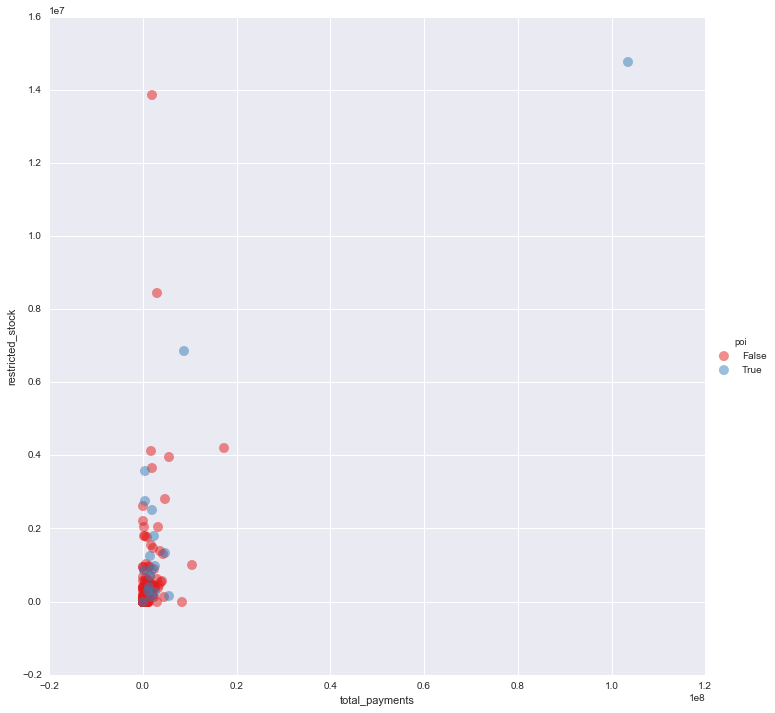

In [45]:
# scatter plot - resricted stock v. total payments

import seaborn as sns  
%matplotlib inline               

col_2 = 'restricted_stock'
col_1 = 'total_payments'

sns.lmplot(x = col_1, y = col_2, hue = 'poi', data = enron_df, 
           ci = None, fit_reg = False, size = 10, aspect = 1, palette="Set1", scatter_kws={"s": 100, 'alpha': 0.5})



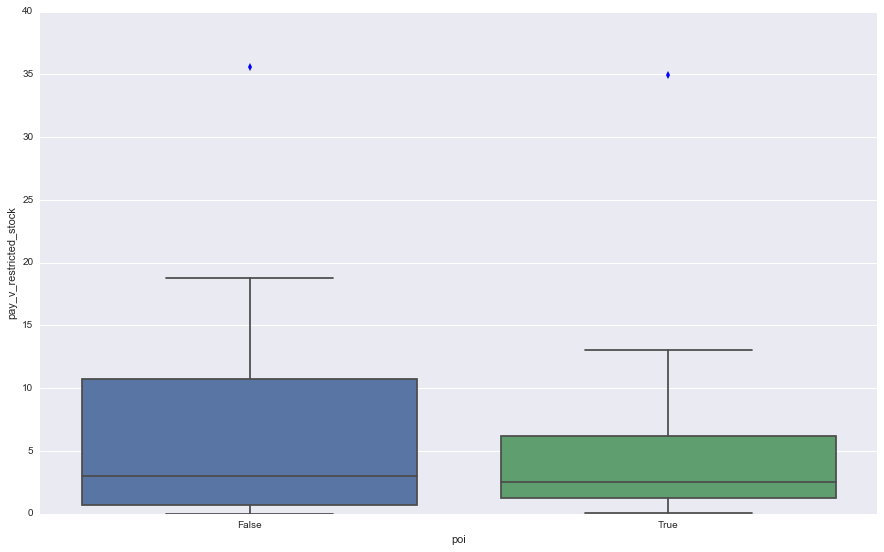

In [74]:
# distribution - resricted stock options v. total payments
enron_df['pay_v_restricted_stock'] = enron_df['total_payments'] / enron_df['restricted_stock']

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'pay_v_restricted_stock', x = 'poi', data = enron_df)


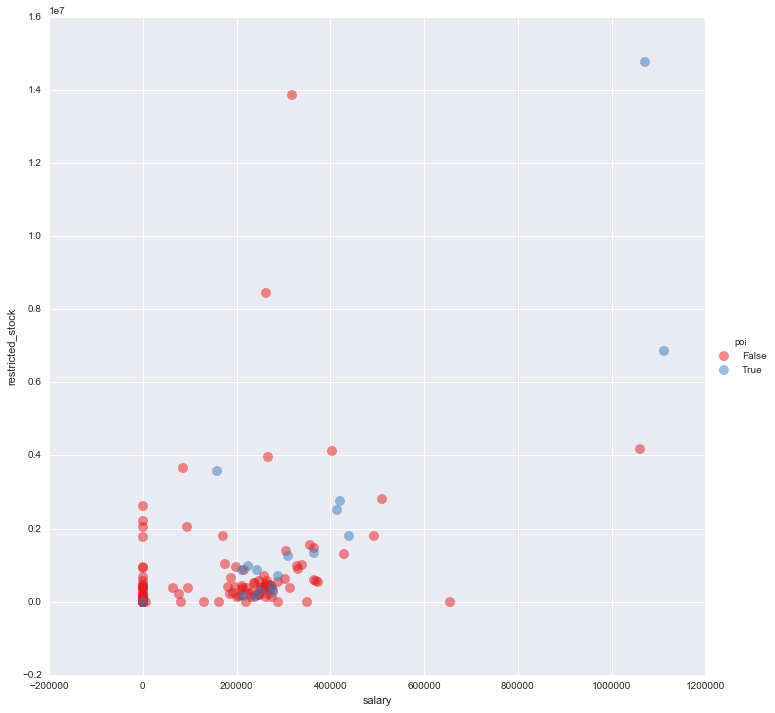

In [53]:
# scatter plot - resricted stock v. salary

import seaborn as sns  
%matplotlib inline               

col_1 = 'salary'
col_2 = 'restricted_stock'

sns.lmplot(x = col_1, y = col_2, hue = 'poi', data = enron_df, 
           ci = None, fit_reg = False, size = 10, aspect = 1, palette="Set1", scatter_kws={"s": 100, 'alpha': 0.5})

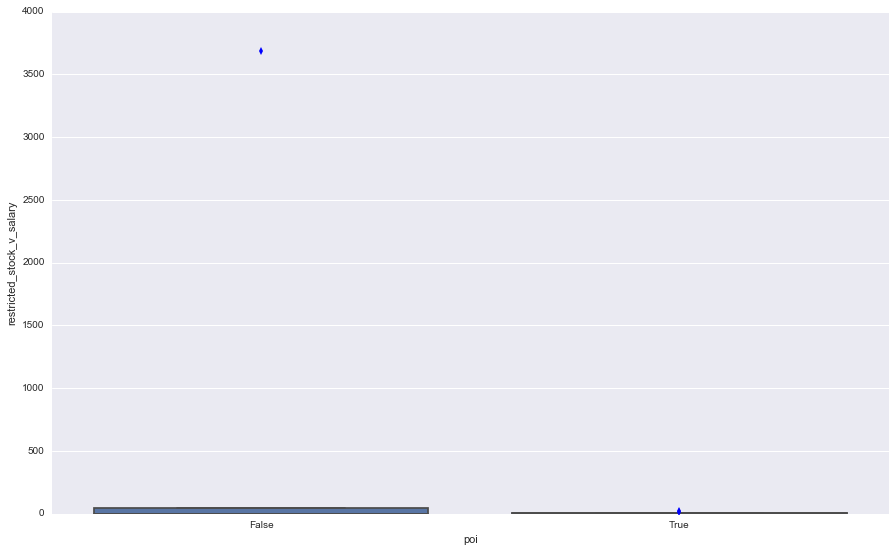

In [71]:
# distribution - resricted stock v. salary
from __future__ import division


enron_df['restricted_stock_v_salary'] =  (enron_df['restricted_stock'] / enron_df['salary'])

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'restricted_stock_v_salary', x = 'poi', data = enron_df)

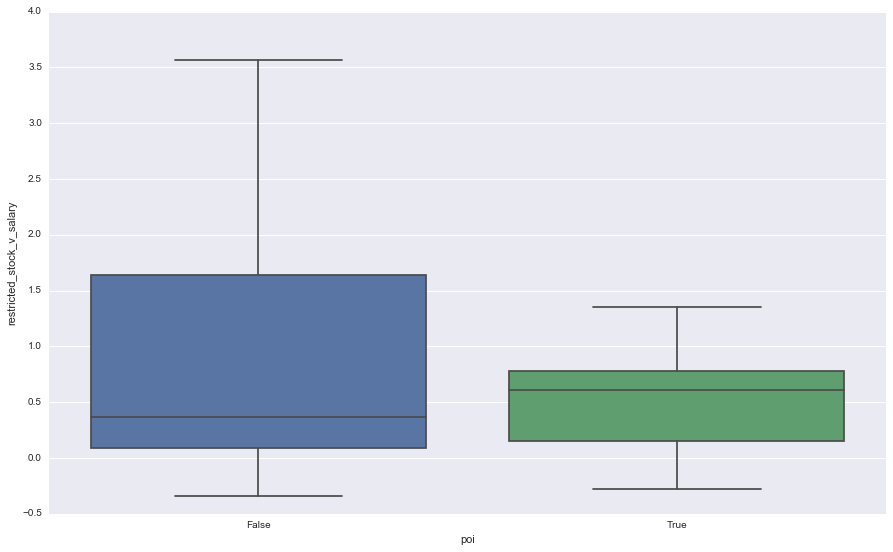

In [72]:
# distribution - resricted stock v. salary - log10
from __future__ import division


enron_df['restricted_stock_v_salary'] =  np.log10(enron_df['restricted_stock'] / enron_df['salary'])

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'restricted_stock_v_salary', x = 'poi', data = enron_df)

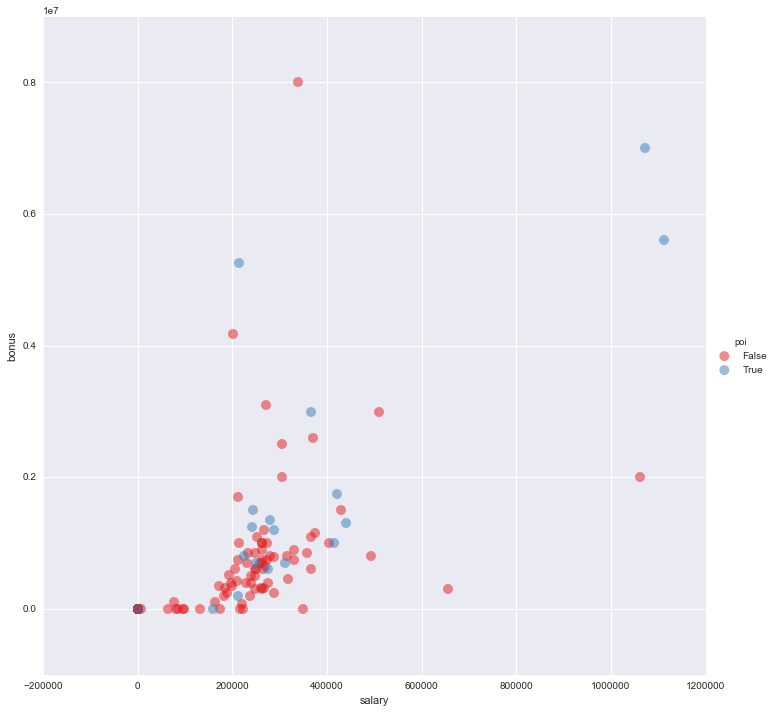

In [57]:
# scatter plot - resricted stock v. salary


import seaborn as sns  
%matplotlib inline               

col_1 = 'salary'
col_2 = 'bonus'

sns.lmplot(x = col_1, y = col_2, hue = 'poi', data = enron_df, 
           ci = None, fit_reg = False, size = 10, aspect = 1, palette="Set1", scatter_kws={"s": 100, 'alpha': 0.5})

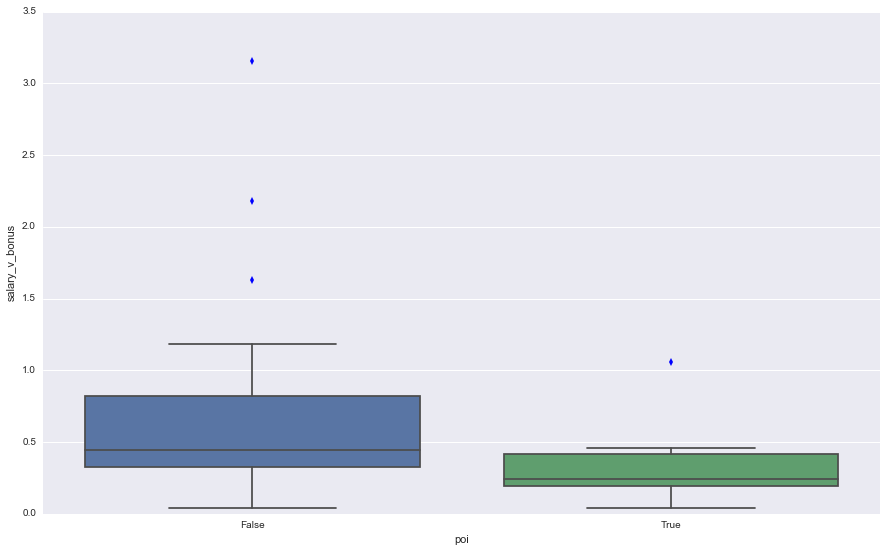

In [56]:
# distribution - resricted stock v. salary
enron_df['salary_v_bonus'] = enron_df['salary'] / enron_df['bonus']

plt.figure(figsize=(15,9)) 

sns.boxplot(y = 'salary_v_bonus', x = 'poi', data = enron_df)